In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
dataview = load_iris()
dir(dataview)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
dataview.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
l_data = pd.DataFrame(dataview.data , columns = dataview.feature_names)
l_data['target'] = dataview.target
l_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
x = l_data.drop(['target'], axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y = l_data.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [70]:
len(x_test)

45

In [71]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100)

In [72]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_predict = RFC.predict(x_test)

In [74]:
RFC.score(x_test,y_test)

0.9111111111111111

In [75]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cnf = confusion_matrix(y_test,y_predict)
cnf

array([[14,  0,  0],
       [ 0, 14,  1],
       [ 0,  3, 13]], dtype=int64)

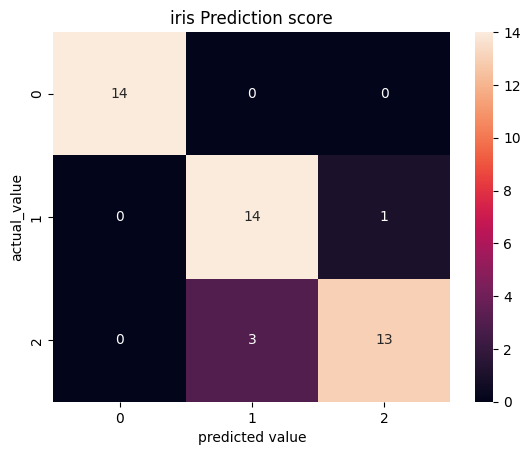

In [77]:
import seaborn as sn
plt.title('iris Prediction score')
sn.heatmap(cnf,annot = True)
plt.xlabel('predicted value')
plt.ylabel('actual_value')
plt.show()